<a href="https://colab.research.google.com/github/YajuluRenduchintala/Machine-Learning/blob/main/h1_n1_Vaccine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew

#Dataset

In [ ]:
#Loading from the Github
url='https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv'
data=pd.read_csv(url)

In [ ]:
data.head() #First five rows of the dataset

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
data.shape

(26707, 34)

In [ ]:
data.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
data.isnull().sum() #checking for missing values and No null

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

#Data Featuring

In [ ]:
#The dataset has null values
#These NaN/null values are replaced by appropriate values using SimpleImputer

from sklearn.impute import SimpleImputer
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# Create imputers for numeric and non-numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

# Fill missing values in numeric columns
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])

# Fill missing values in non-numeric columns
data[non_numeric_columns] = non_numeric_imputer.fit_transform(data[non_numeric_columns])


In [ ]:
# Combine numeric and non-numeric columns
data_filled = data.copy()

In [ ]:
# Separate the features (X) and the labels (y)
X = data_filled.drop('h1n1_vaccine', axis=1)
y = data_filled['h1n1_vaccine']

from scipy.stats import boxcox
# Define the numerical columns
numerical_columns = X.select_dtypes(include=np.number).columns.tolist()
# Calculate the number of rows and columns for subplots
num_plots = len(numerical_columns)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))

In [ ]:
# Initialize the encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray())

# Assign column names to the encoded DataFrame
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)


In [ ]:
# Concatenate the skewness removed numerical columns with the encoded categorical columns
X_combined = pd.concat([data_skewness_removed[numerical_columns], X_encoded], axis=1)

# Initialize and fit the classifier
clf = RandomForestClassifier()
clf.fit(X_combined, y)

# Get feature importances
feature_importances = clf.feature_importances_

In [ ]:
average_importance = np.mean(feature_importances)

In [ ]:
selected_encoded_columns = []
for i, importance in enumerate(feature_importances):
    if importance > average_importance:
        selected_encoded_columns.append(X_encoded.columns[i])

# Subset the encoded DataFrame with the selected columns
X_selected = X_encoded[selected_encoded_columns]

In [ ]:
X_final = pd.concat([data_skewness_removed[numerical_columns], X_selected], axis=1)

#Data Visualization

<ipython-input-69-1a605211c89d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_subset.corr()


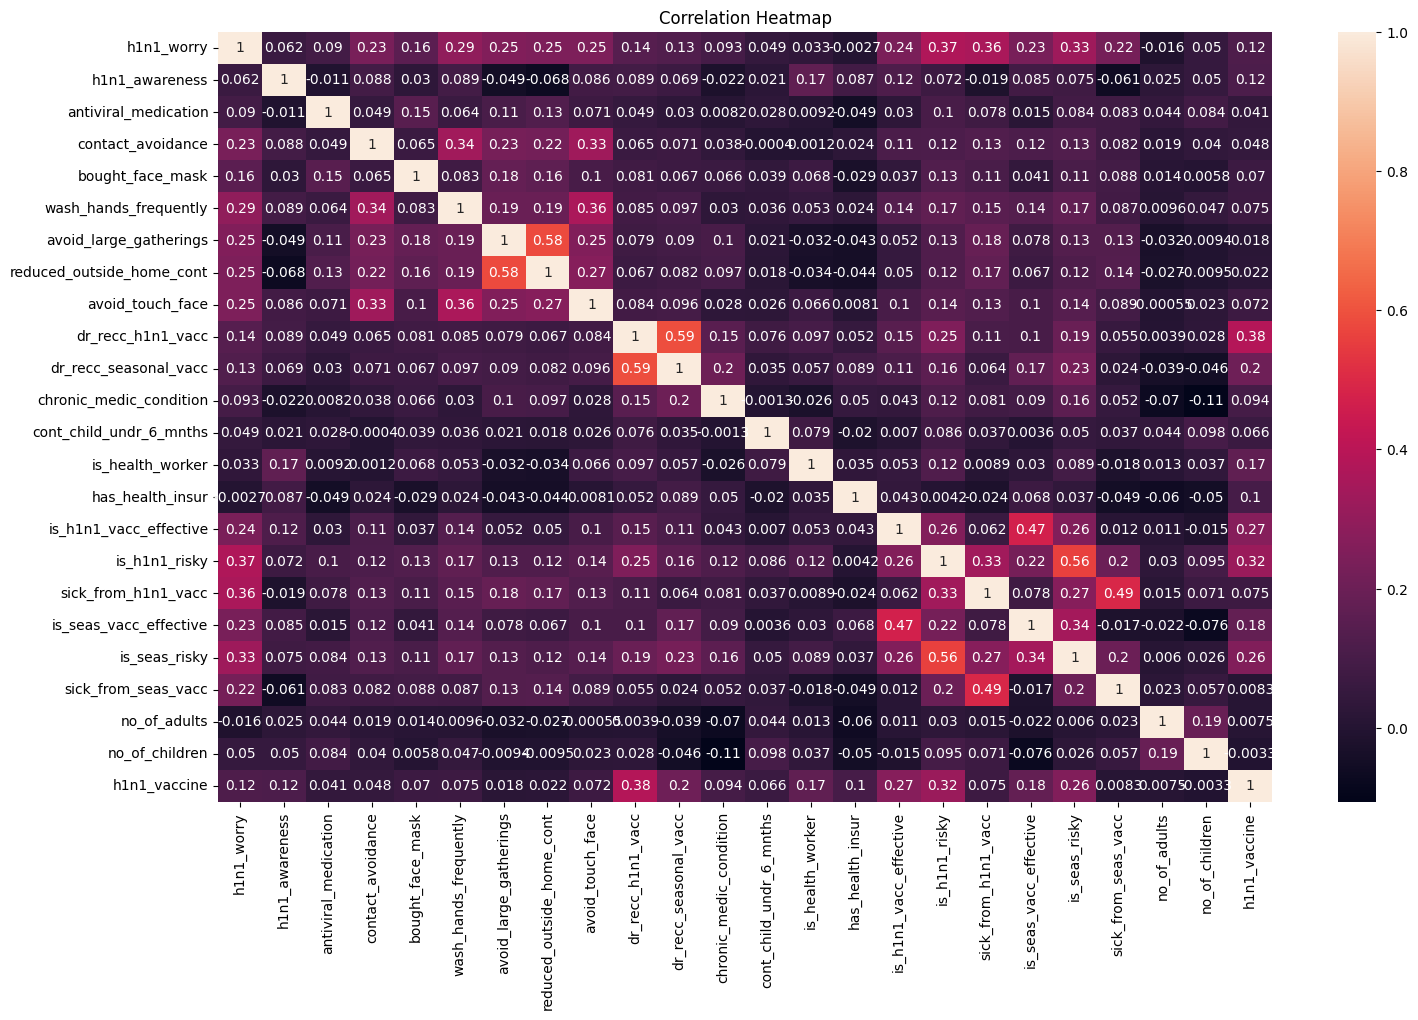

In [ ]:
#Correlation HeatMap
# Exclude the first column as it is unique Id which is not related to the h1n1 vaccination and it is generated dynamically
data_subset = data_filled.iloc[:, 1:]

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Plot the heatmap
plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

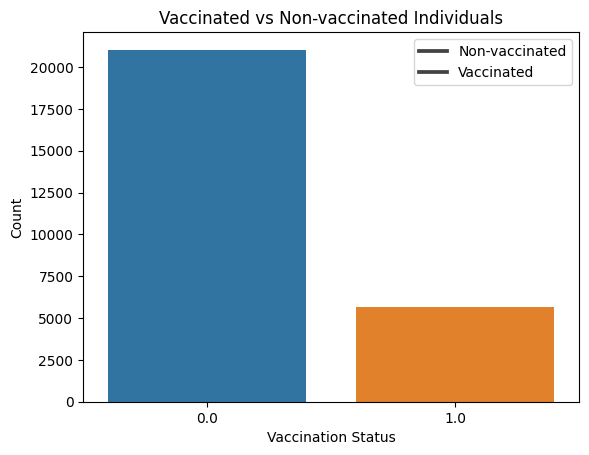

In [ ]:
# Count the occurrences of each target variable value
vaccine_counts = data_filled['h1n1_vaccine'].value_counts()

# Create a bar plot
sns.barplot(x=vaccine_counts.index, y=vaccine_counts.values)

# Add labels and title to the plot
plt.xlabel('Vaccination Status')
plt.ylabel('Count')
plt.title('Vaccinated vs Non-vaccinated Individuals')
plt.legend(labels=['Non-vaccinated', 'Vaccinated'])

# Display the plot
plt.show()

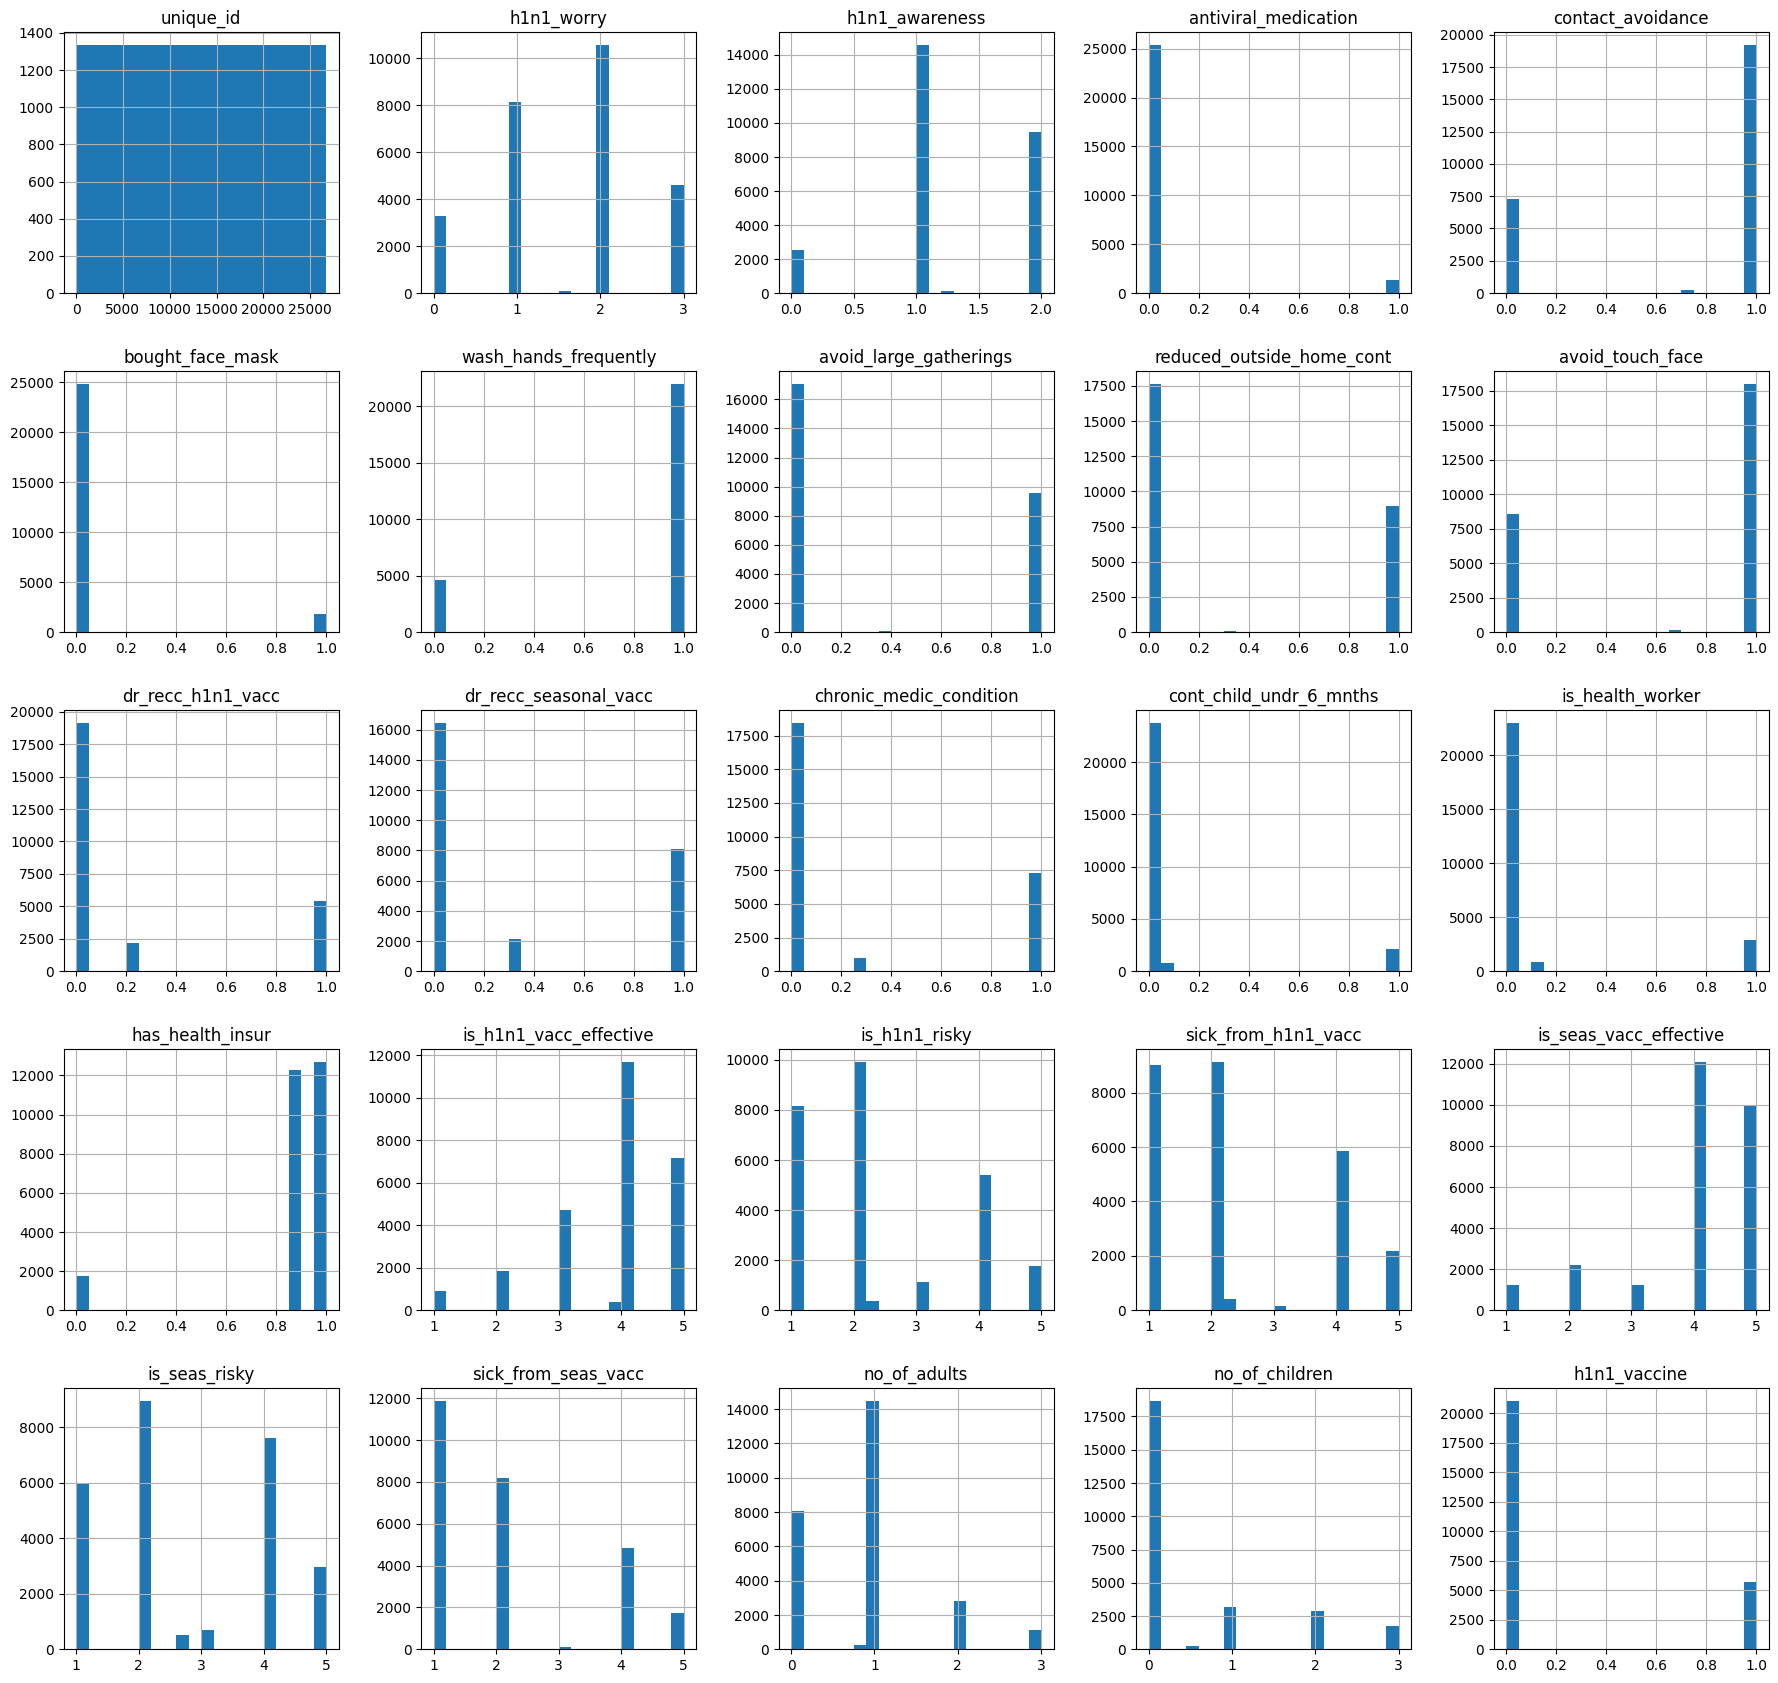

In [ ]:
data_filled.hist(figsize=(22,21), bins=20);

<ipython-input-72-0eeb661f063c>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


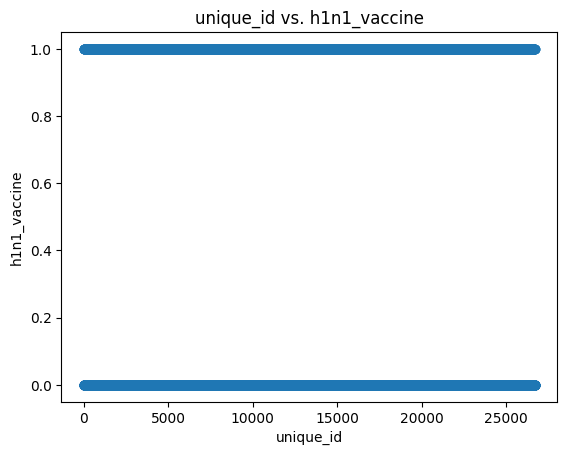

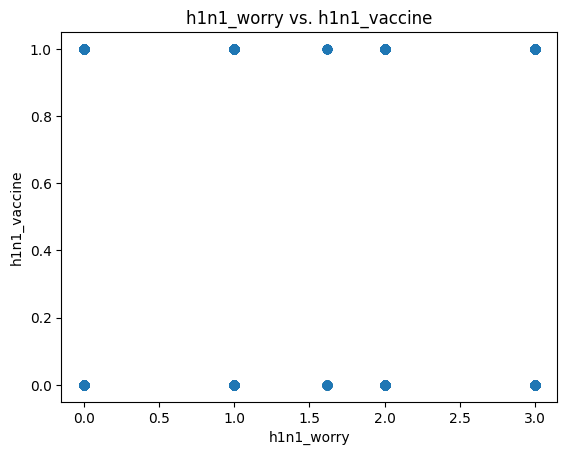

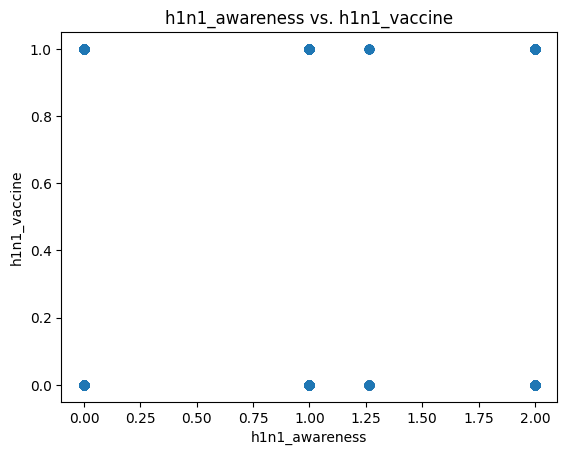

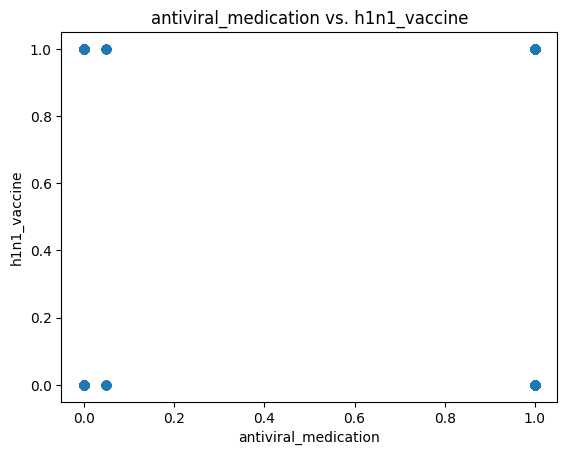

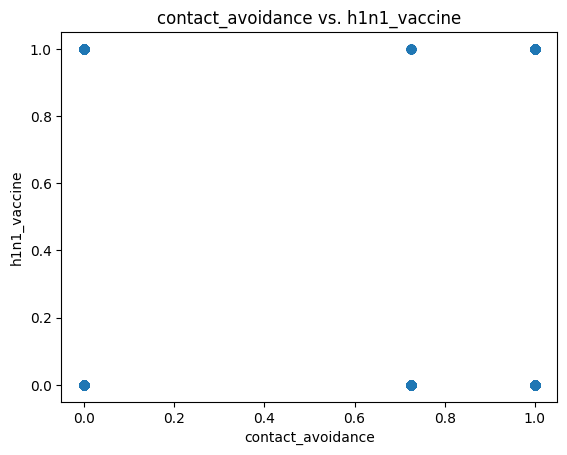

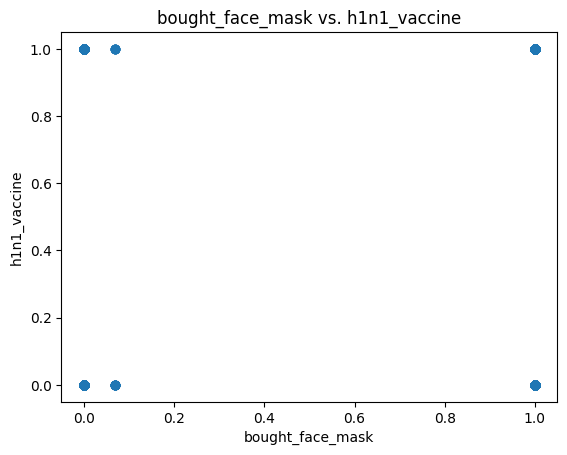

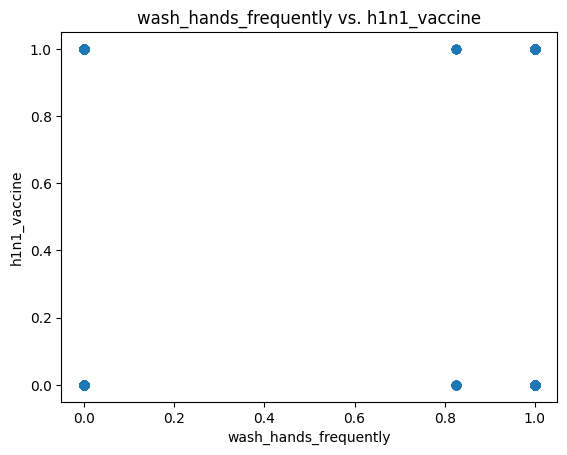

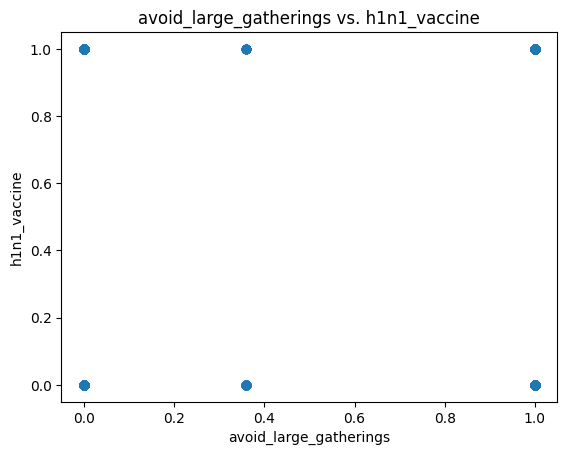

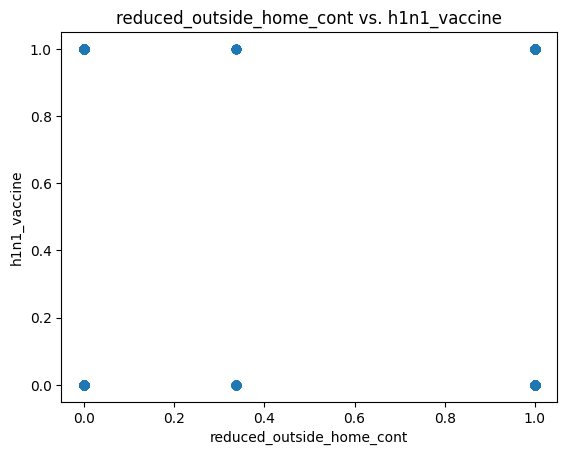

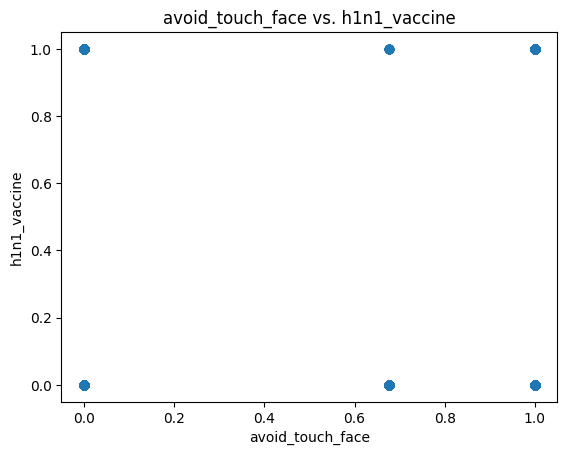

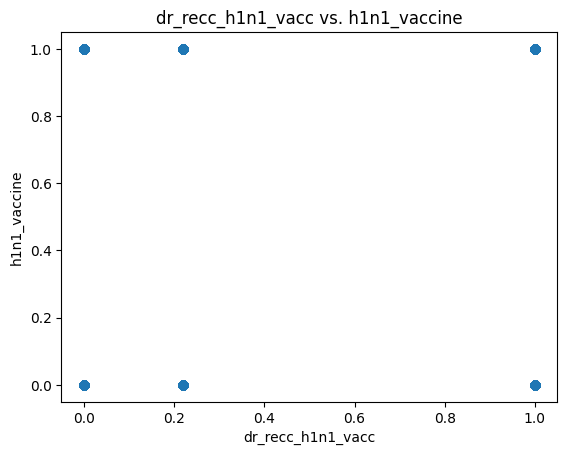

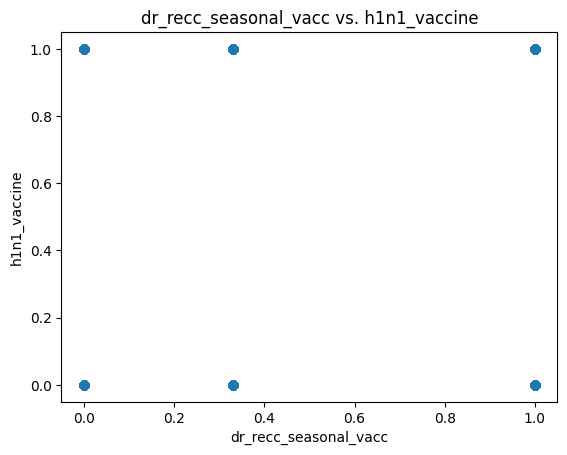

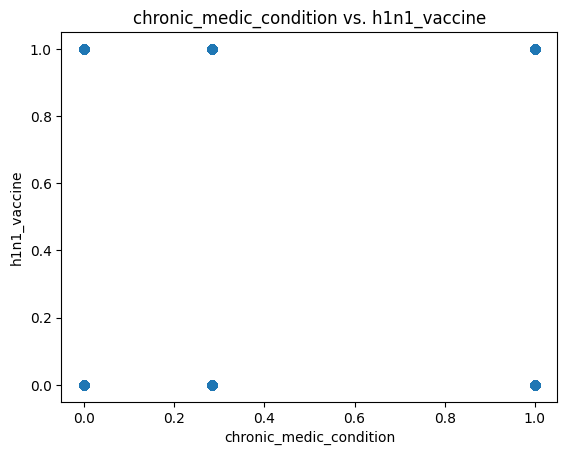

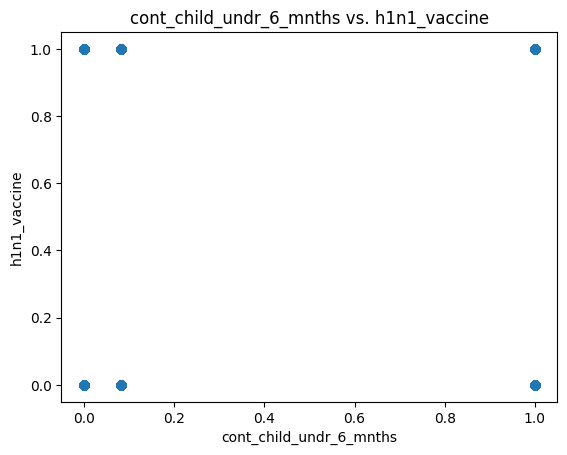

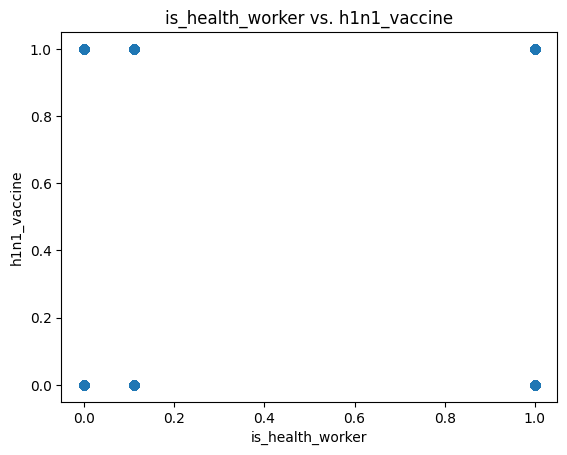

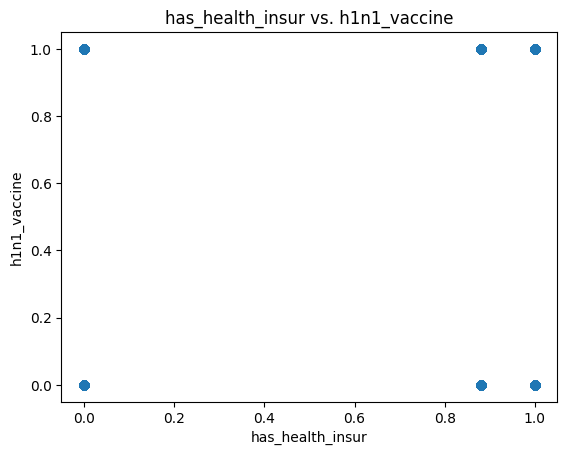

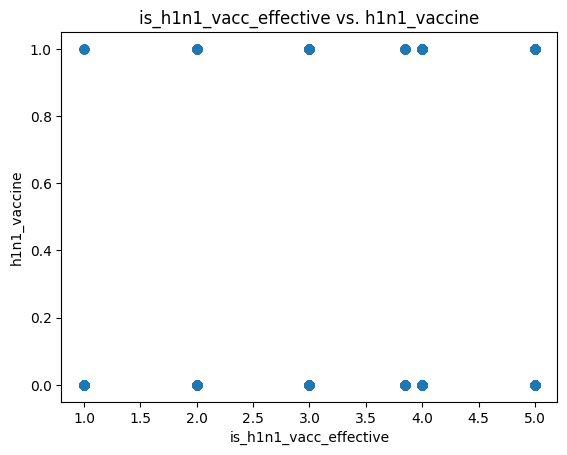

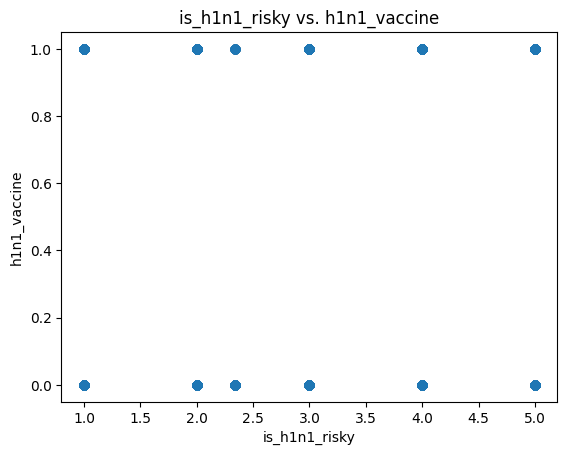

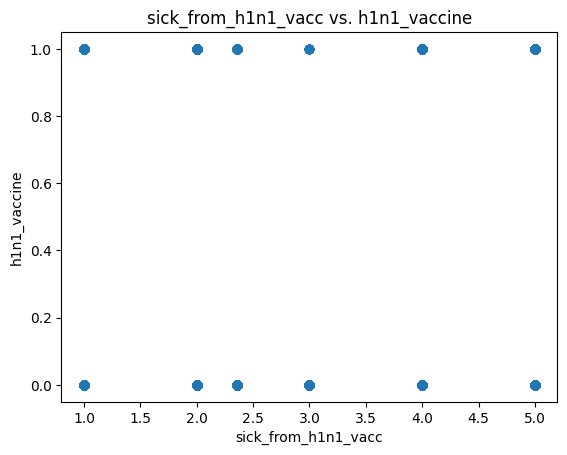

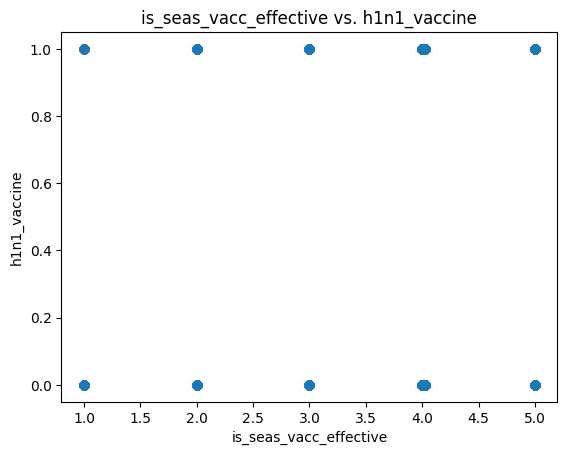

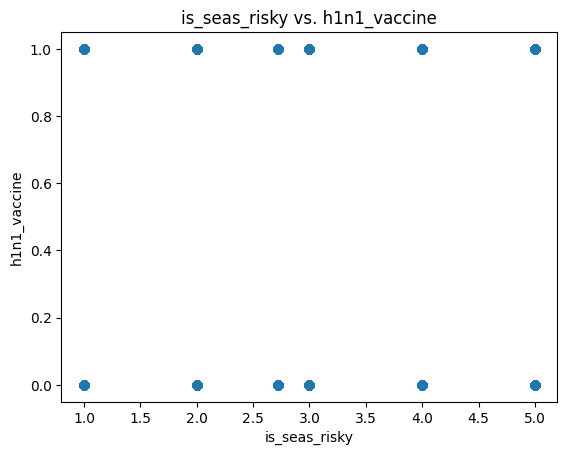

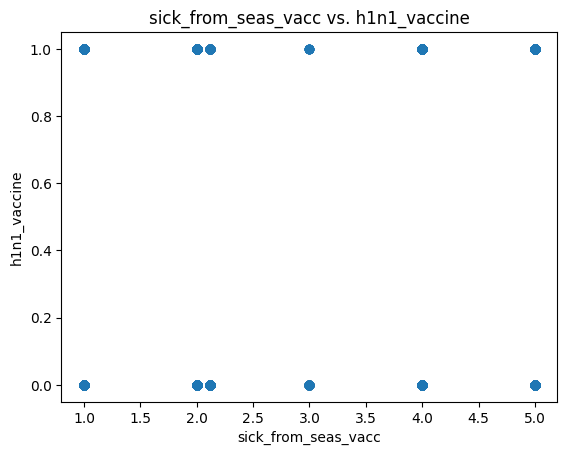

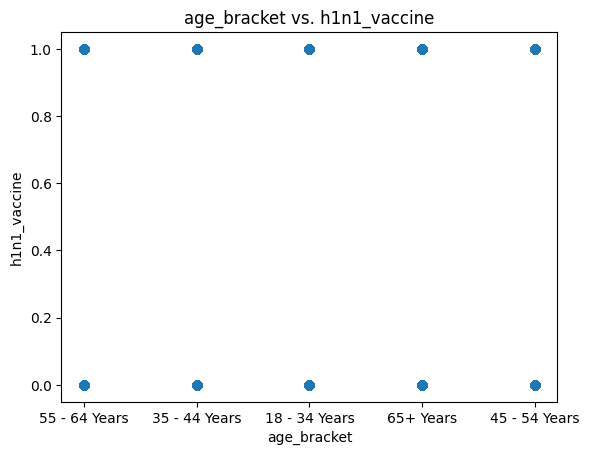

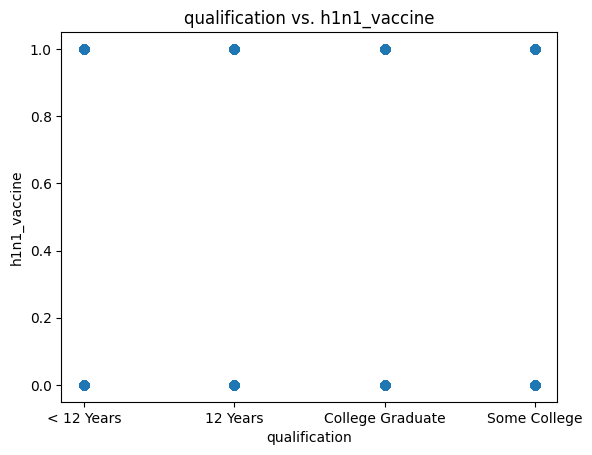

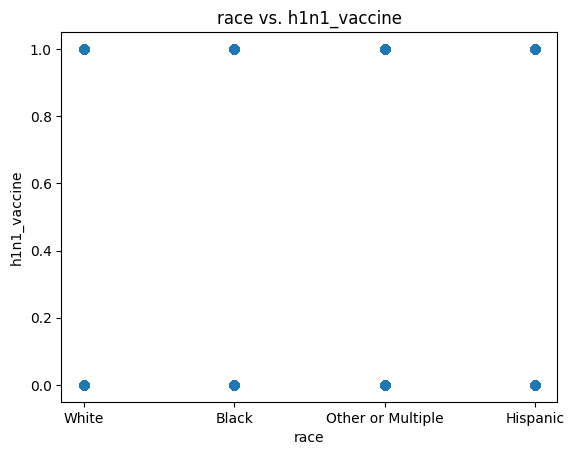

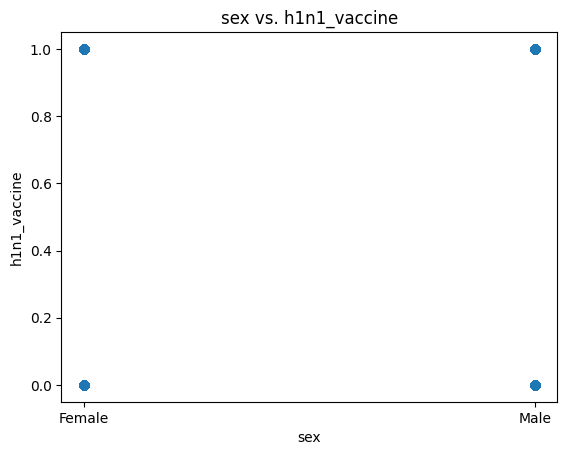

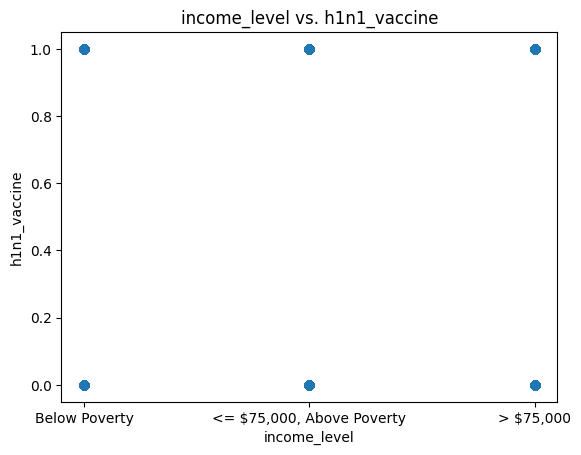

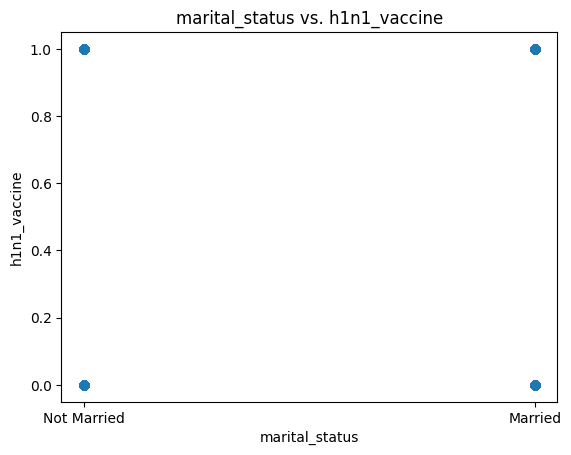

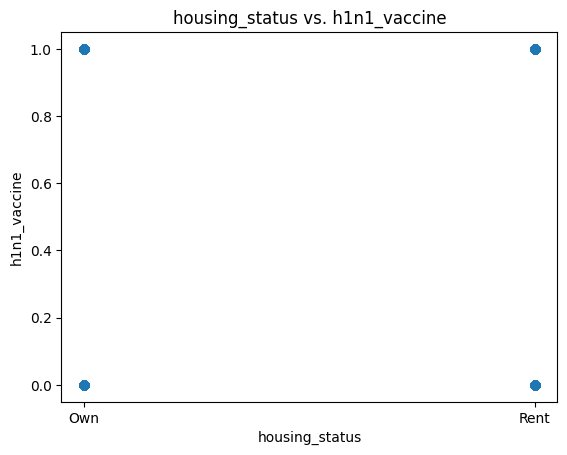

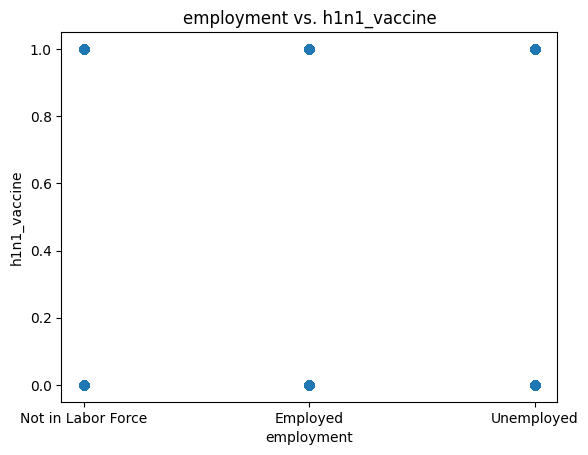

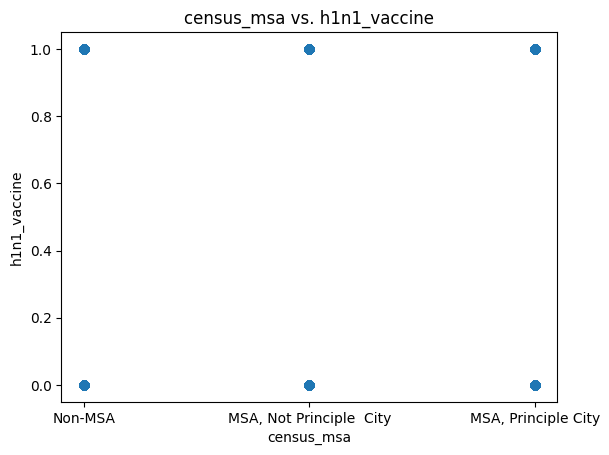

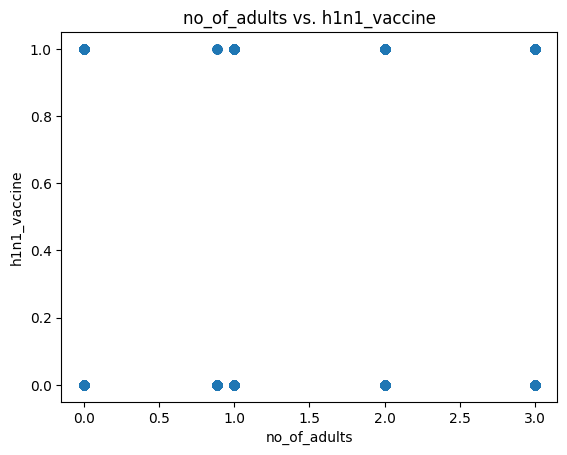

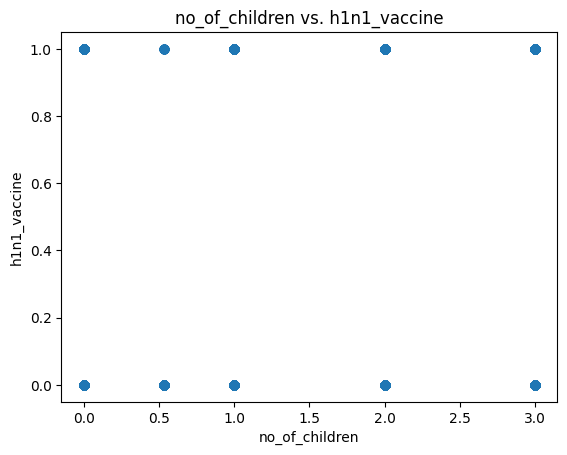

In [ ]:
# Get the column names
columns = data_filled.columns

# Remove the 'h1n1_vaccine' column from the list
columns = [col for col in columns if col != 'h1n1_vaccine']

# Plotting each column against 'h1n1_vaccine'
for col in columns:
    plt.figure()
    plt.scatter(data[col], data['h1n1_vaccine'])
    plt.xlabel(col)
    plt.ylabel('h1n1_vaccine')
    plt.title(f'{col} vs. h1n1_vaccine')

# Display the plots
plt.show()

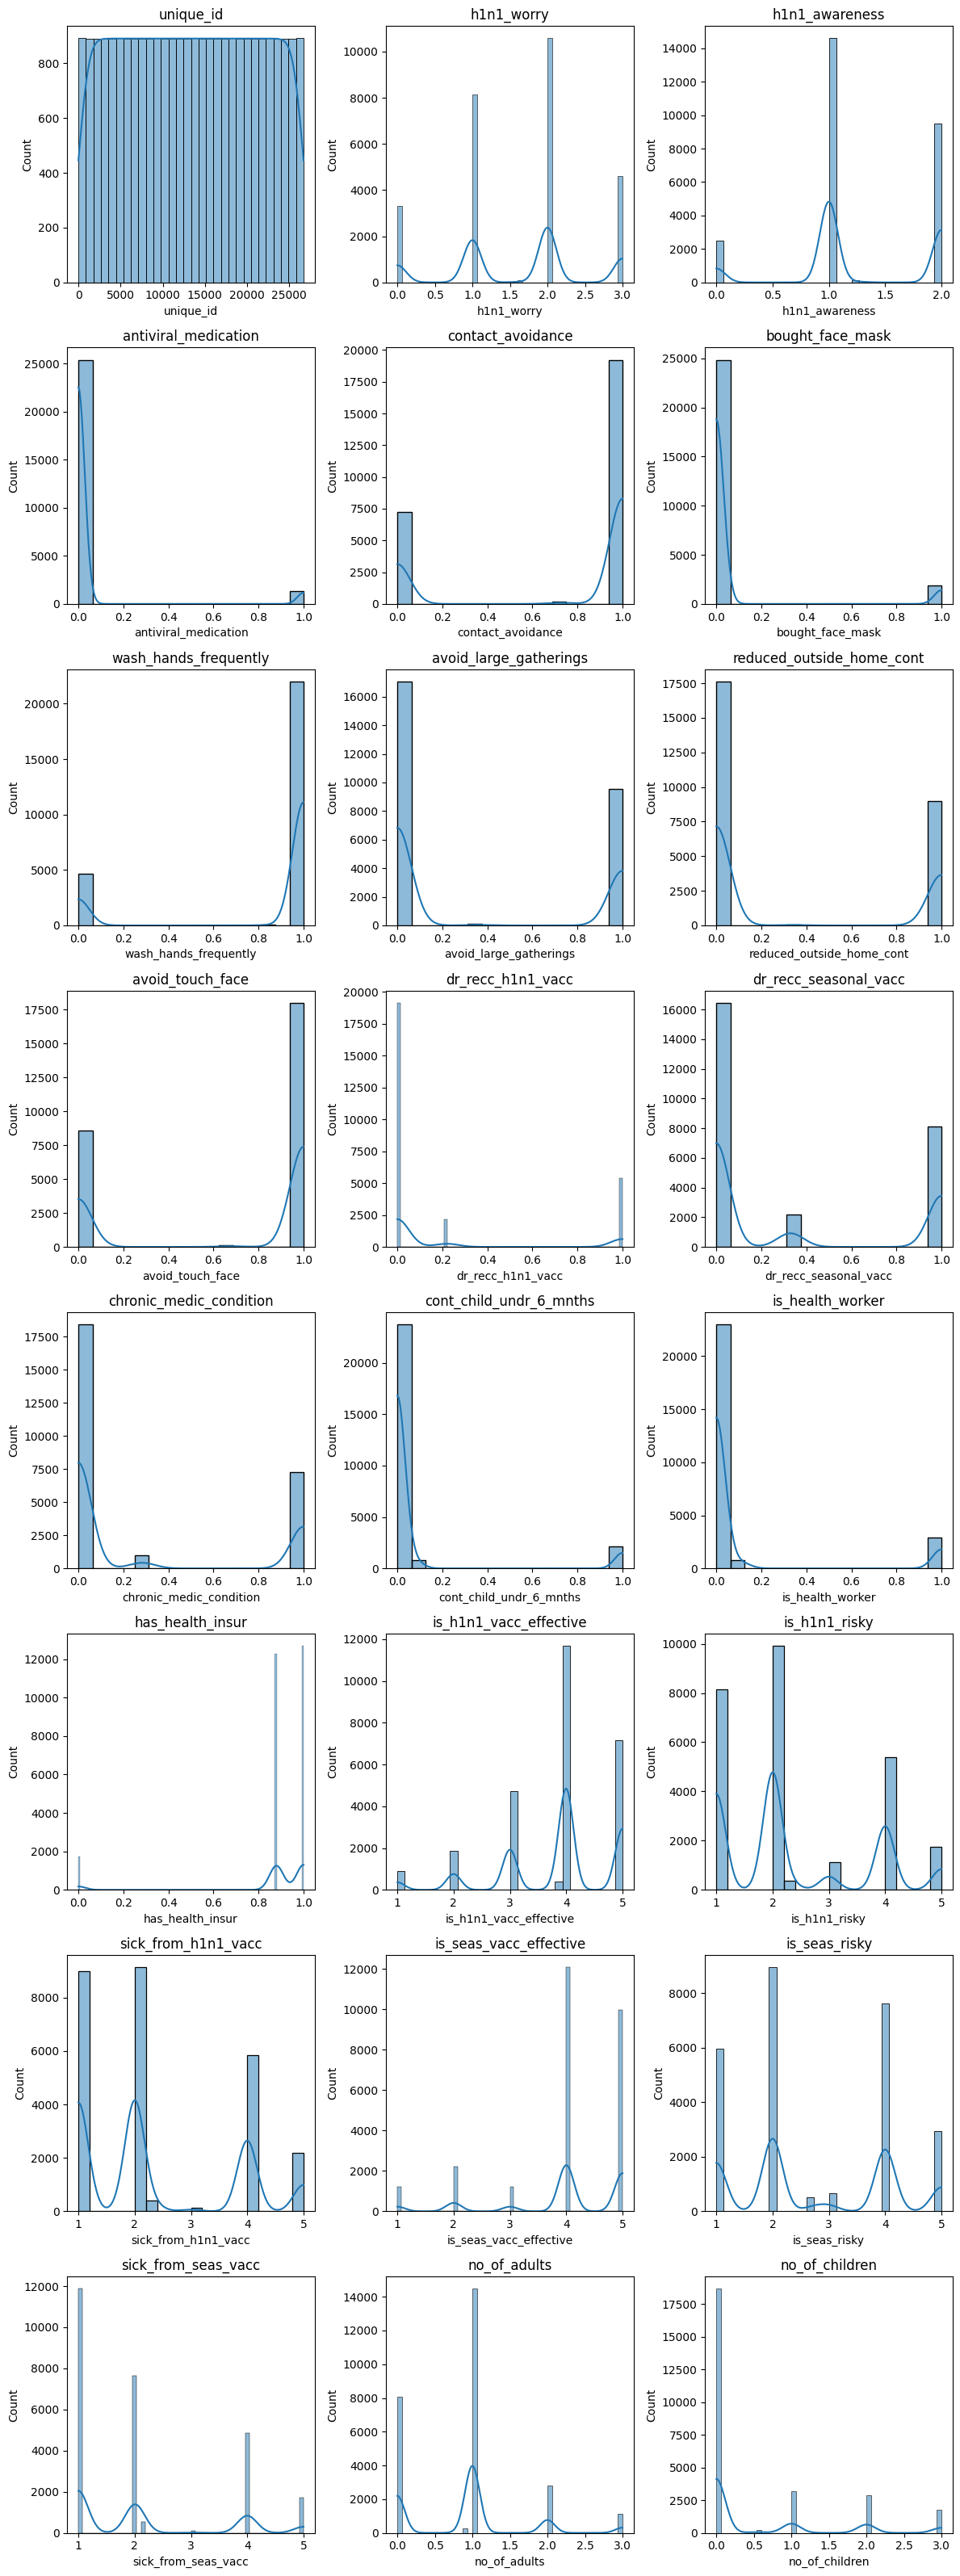

In [ ]:
# Plot the distributions before removing skewness
plt.figure(figsize=(12, 4 * num_rows))
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


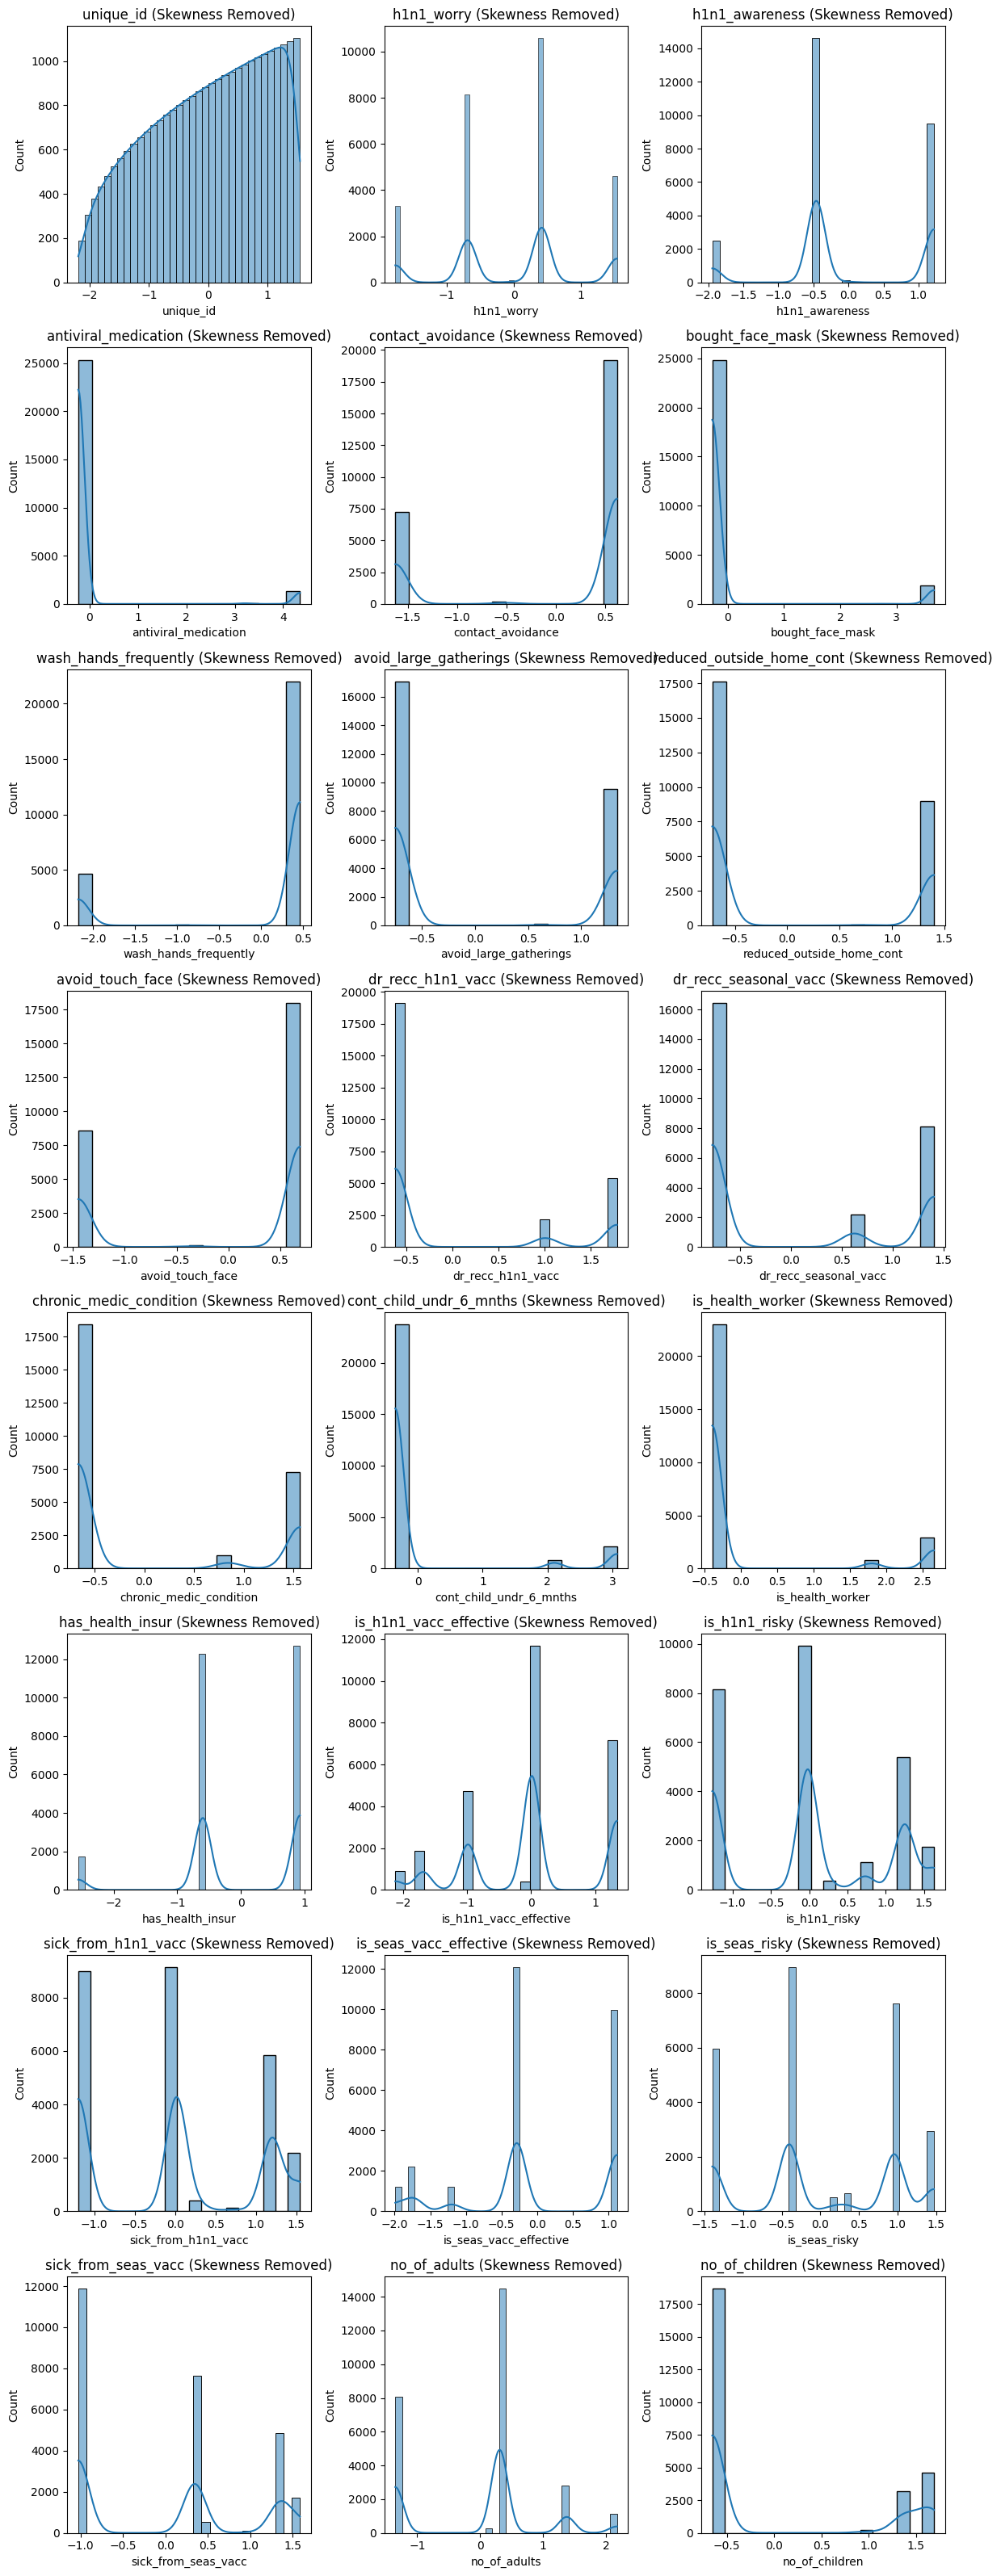

In [ ]:
# Apply Yeo-Johnson transformation to remove skewness
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
data_skewness_removed = X.copy()
data_skewness_removed[numerical_columns] = transformer.fit_transform(X[numerical_columns])

# Plot the distributions after removing skewness
plt.figure(figsize=(12, 4 * num_rows))
for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data_skewness_removed[column], kde=True)
    plt.title(column + " (Skewness Removed)")
plt.tight_layout()
plt.show()

#Model Training

In [ ]:
#Dividing the final data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=1)

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)
y_pred_log = classifier_log.predict(X_test)

In [ ]:
#K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=10)
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)

In [ ]:
#Decision Tree Classifier

from sklearn import tree
classifier_tree=tree.DecisionTreeClassifier()
classifier_tree.fit(X_train,y_train)
y_pred_tree=classifier_tree.predict(X_test)

In [ ]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators=15,random_state=1)
classifier_forest.fit(X_train,y_train)
y_pred_forest = classifier_forest.predict(X_test)

#Model Evaluating

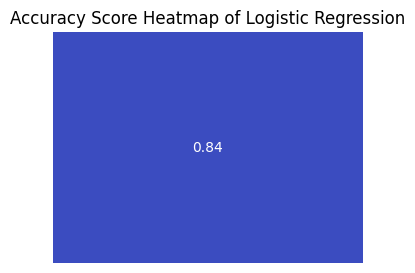

In [ ]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_log)

# Create a correlation matrix with the accuracy score
corr_matrix = np.array([[accuracy]])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Accuracy Score Heatmap of Logistic Regression')
plt.xticks([])
plt.yticks([])
plt.show()

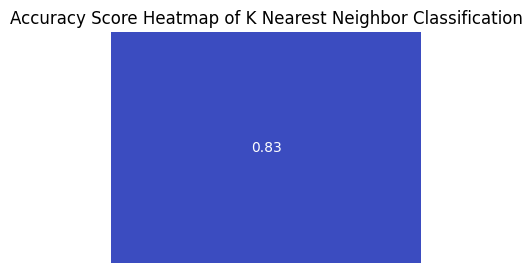

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_knn)

# Create a correlation matrix with the accuracy score
corr_matrix = np.array([[accuracy]])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Accuracy Score Heatmap of K Nearest Neighbor Classification')
plt.xticks([])
plt.yticks([])
plt.show()

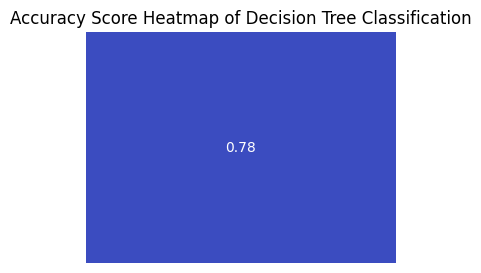

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_tree)

# Create a correlation matrix with the accuracy score
corr_matrix = np.array([[accuracy]])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Accuracy Score Heatmap of Decision Tree Classification')
plt.xticks([])
plt.yticks([])
plt.show()

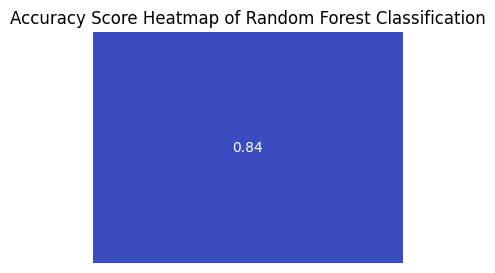

In [ ]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred_forest)

# Create a correlation matrix with the accuracy score
corr_matrix = np.array([[accuracy]])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Accuracy Score Heatmap of Random Forest Classification')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Therefore based on the above models and their accuracy scores either
# 'Logistic Regression' or 'Random Forest Regression' can be used for this dataset